<a href="https://colab.research.google.com/github/Ivovs65/Siamese_One_Shot_Reproduction/blob/master/Siamese_One_Shot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Siamese Neural Networks for One-Shot Image Recognition** 
---
Bishwas Regmi, 4467655 b.regmi@student.tudelft.nl

Daan Boeke, 4471539 d.boeke@student.tudelft.nl

Ivo van Straalen, 4467531, i.vanstraalen@student.tudelft.nl

<img src='Figures/Figure1.PNG' width="300"/>

## Introduction
One of the biggest bottlenecks in machine learning is the acquisition of training data. Humans are able to quickly recognize variants of previously seen data, while machines need a lot of (labelled) training examples to make accurate predictions. One way of combatting this is One-Shot Learning (Fei-Fei et al., 2006, Lake et al., 2011), where the model needs to predict the class of a given sample by comparing it to a single representative of each or some of the classes. In this post we reproduce the results of Koch et al. 2015 ([*Siamese Neural-Networks of One-Shot Image Recognition*](https://www.cs.cmu.edu/~rsalakhu/papers/oneshot1.pdf)), in which a Siamese Neural Network is utilized and trained for a one-shot task on the Omniglot dataset. The main goal of this post is to reproduce the results of the verification task by Koch et al. This reproduction is part of the course CS4240 Deep Learning at the TUDelft, where this reproduced paper is one of the many as presented in https://reproducedpapers.org/  . In addition to this, the one-shot results are also reproduced. A lot of different implementations are available online by indepedent authors, however, they either only focus on the one-shot task, are written in a different framework than pytorch, or are missing important details from the paper, thus a lot of the code was written from scratch. The code is given below for the interested.

## Method and Architecture
The goal of the model is to predict whether two samples from the Omniglot data set are variations of the same character. 
The model used to attain this behaviour is a Siamese Neural Network (Bromley et al., 1993). A siamese neural network consists of two branches of twin networks with tied weights, meaning the two networks share the same weights and structure, and are combined into some other network. This means a siamese neural network has two distinct inputs and produces one output. In this case the network accepts two images from the Omniglot dataset of 105x105 pixels and outputs a single number, representing the probability the two images come from the same class. The detailed architecture used can be seen in the figure below. It is important to remember that the two networks before fusion are in reality the same network used twice. In summary: the first part of the network consists of 4 convolutional layers, followed by a fully connected layer. This is done for both images, after which the two results are combined by computing the element-wise L1-distance between the two vectors. Finally, this vector is then used as the input of the final fully connected layer resulting in the output of the network. 

![Figure 1](Figures/real_siamese.png)

**Loss Function** 

The loss function used to train this network is a binary cross-entropy loss function with L2-regularization given by: 


\begin{equation}
  \mathcal{L}(x_1, x_2) = y(x_1, x_2) \cdot log(p(x_1, x_2)) + (1-y(x_1, x_2)) \cdot log(1-p(x_1, x_2)) + \lambda^T |{w}|^2.
\end{equation}


Here y represents the label of the image pair, which is 1 when the two are from the same character class and 0 otherwise; p is the output of the network and represents the prediction, w is the vector of network weights and labda is the regularization constant. Adam was used as optimizer. The convolutional layers were initialized with $\mathcal{N}$($\mu$, $\sigma$) = $\mathcal{N}(0, 10^{-2}$) for the weights and $\mathcal{N}(0.5, 10^{-2})$ for the biases. The fully connected layers were initialized with $\mathcal{N}(0.5, 10^{-1})$ for the weights and $\mathcal{N}(0.5, 10^{-2})$ for the biases. 

## Dataset
The dataset that the model was trained on is Omniglot dataset. It consists of images of characters from 50 different alphabhets. Each alphabet has 15-40 characters and each character has 20 different handwritten samples. The omniglot dataset is divided into 'images_background' which consists of 30 of the 50 alphabets and 'images_evaluation' which contains the rest of the 20 alphabets.  

**Training, Validation and Test Sets** 

The training , validation and test sets ('TrainSet', 'EvalSet' and 'OneShotTestSet') are made as described in the paper. For TrainSet, 60% of the first 30 alphabets is used. This means that 12 out of the 20 handdrawn samples were chosen for each character of the 30 alphabets.  From these samples, 30k, 90k and 150k pairs were made randomly, while ensuring that the 50% of the pairs were of the same character.  For EvalSet, 40% of the character samples were chosen from the first 10 alphabets in the 'images_evaluation' folder. From these samples, 10k random pairs were made. For OneShotTestSet, 40% of the characters from the remaining 10 alphabets were chosen. An additional validation set called 'OneShotValSet' is also created from the same samples as in the EvalSet. This OneShotValSet is used to perform One-Shot validation after each epoch. The One-Shot validation error is used for early-stopping of the training, i.e., the training will stop if the One-Shot validation error does not decrease for 20 consequitive epochs.

## Experiments
The network is trained separately on 30k, 90k, 150k, 30k x 9 (affine distortions, 90k x 9 (affine distortions) and 150k x 9 (affine distortions)  pairs of images.  For training, Adam optimizer is used, which optimizes the Binary Cross Entropy loss between the output of the model and the ground truth. The training is done on batches, where each batch is 128 pairs of images. The model is trained for a maximum of 200 epochs. It can be stopped early if the the One-Shot validation error does not decrease for 20 consequitive epochs. There are checkpoints saved every 10 epochs. These checkpoints are used to resume the training if it was interrupted before completion. Also, each time the One-Shot validation error decreases, a checkpoint called 'best.pt' is saved. This checkpoint is later used for the final One-Shot Test. After the network is fully trained, the 'best.pt' checkpoint is loaded and One-Shot Test is performed on the model.

## Results
The best achieved validation accuracies for each of the different training set sizes are summarized in the table below.
The Table shows the corresponding accuracies reported by the original paper in the second column and our reproduced accuracies in the last column. The reproduced accuracies for the training sets without affine transformations present resemble the paper accuracies closely, only differing by at most 0.14%, which could simply be explained by the difference in (random) sampling. The training sets with affine transformations all show a significant increase in accuracy compared to the original reported accuracy, up to about 1.5% for the 90k with affine transformations set. This might indicate that our approach for adding affine transformations differs from the paper. However, as we achieve similar or greater accuracies, we consider the papers verification results reproduced.

<img src='Figures/Table1_updated.PNG' width="300"/>

## Discussion and analysis
When working on this reproducibility project, we tried to follow the paper's descriptions on the several procedures as closely as possible. However, in some cases unclarity or lack of information was leading to discussion points.

**Dataset creation** 

We found that the paper left a room for interpretation when it defined the dataset splitting procedure. The procedure led to some confusion concerning the validation set. As we initially thought we had to create the validation set from the 8 drawers left unused from the training data. When we ran the experiment, we ended up with accuracies reaching up to 97.8% using the largest training set. As this was significantly above the stated accuracy, we then figured that we had to use 10 alphabets out of the 20 alphabets from the evaluation folder. Using these led to the achieved reported results, which more closely resembled the papers accuracies. However, we are still in doubt if we might misunderstood the authors mentioned data splitting. 

**Optimization** 

The paper used the beta version of a Bayesian optimization framework called Whetlab to optimize the hyperparameters. However, at the time of reproduction this framework was not publicly available anymore and not all the optimization details were given in the paper. Therefore, we have used the Adam optimizer instead as this is easy to use and often very reliable. We tried to incoperate as much of the information that was available to resemble the original paper as closely as possible. 

**Affine transformations** 

 As mentioned in the results, we achieved considerably better results for the training sets which include affine transformations compared to the original paper. We noticed that when using the prescribed parameter ranges for the affine transformation components, the characters were partially moved outside of the frame occasionally. In our code we prevent this from happening to prevent losing any image information. It could be possible that the authors of the original paper did not constrain the transformation in this manner, which could have let them to lose some valuable information on these images and therefore lose accuracy. Naturally, it could also be that our approach of adding transformations to the training set was incorrect leading to a positive bias in our resulting accuracies.

## Analysis
In addition to reproducing the requested verification Table, we also did some additional analysis.

**One-shot error**

 After that we obtained our models, we were interested in seeing how well they would perform on the main task of the paper: one-shot learning. We implemented the method described in the one-shot learning section and tested all our 6 model on data from the test set. This resulted in the table below.
As can been seen, the accuracy steadily increases with increasing training set size and the best model, 150k with affine distortions, almost reaches the papers one shot accuracy of 92%. The difference could be explained by the fact that in our reproduction we averaged 10 runs of the one-shot task, while the paper does not specify anything about this.

<img src='Figures/OneShotTable.PNG' width="400"/>
**First layer filters**

 The paper illustrates the convolutional filters present in the first layer of their 150k with transformation model. You can clearly see each filter adapting its own role, most of the filters looking for small points in the input images and some that represent lines to detect edges. We thought it would be interesting to see how the filters in our first layer compare to the ones in the paper and see if our best model learns different features to accomplish the same task. In figure below, the filters from the first convolutional layer are visualized. As can be seen, the filters seem mainly to focus on lines present in the image, with a few focussing on dots. The filters from the paper seem to focus much more on a lot of small dots in each filter, while the reproduced filters focus at most at 2 larger dots. This might be caused by the use of a different optimizer and would be interesting to investigate further. As reference the filters of the first layer given in the paper is shown first.


<img src='Figures/FirstLayerPaper.PNG' width="650"/>

And our filters:

<img src='Figures/KernelWeights.png' width="650"/>

 **Layer Activations**
Although the paper does not show the activations of each layer, we still found it interesting to see how each layer behaved. The activations of each convolutional filter after input of the following character can be seen below. 

![original](Figures/original.png)

The first convolutional layer seems to detect horizontal and vertical edges, which can be seen by the shadows that form around the character. 

<img src='Figures/layer1.png' width="650"/>

In the second convolutional layer is already much harder to see what happens, but it seems to detect structures of strokes, but the third layer also seems to detect on this. For the fourth layer it is almost incomprehensible what it is doing.

![Layer2 Act](Figures/layer2.png)
![Layer3 Act](Figures/layer3.png)
![Layer4 Act](Figures/layer4.png)



# References
Koch, Gregory, Zemel Richard, and Salakhutdinov, Ruslan. Siamese Neural Networks for One-shot Image Recognition. In *Proceedings of the 32nd International Conference on Machine Learning*, Lille, France, 2015. JMLR: W&CP volume 37. 


Fei-Fei, Li, Fergus, Robert, and Perona, Pietro. A bayesian approach to unsupervised one-shot learning of object categories. In *Computer Vision, 2003. Proceedings. Ninth IEEE International Conference on,* pp. 1134 - 1141. IEEE, 2003. 

Lake, Brenden M, Salakhutdinov, Ruslan, Gross, Jason, and Tenenbaum, Joshua B. One shot learning of simple visual concepts. In *Proceedings of the 33rd Annual Conference of the Cognitive Science Society*, volume 172, 2011. 

Bromley, Jane, Bentz, James W, Bottou, Léon, Guyon, Isabelle, LeCun, Yann, Moore, Cliff, Säckinger, Eduard, and Shah, Roopak. Signature Verification using a siamese time delay neural network. *International Journal of Pattern Recognition and Artificial Intelligence*, 7(04):669-688, 1993



# Loading Dependencies

In [0]:
import os
import shutil
from google.colab import drive
from PIL import Image

import matplotlib.pyplot as plt
import numpy as np

import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
from torchsummary import summary
from torch.utils.data import Dataset

# Setting Up Access To Google Drive

In [0]:
drive.mount('/content/gdrive')
path = '/content'
root_path = path
os.chdir(path)
!pwd

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content


# The Siamese Neural Network

In [0]:
def initWeights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, mean=0, std=0.2)
        m.bias.data.normal_(mean = 0.5, std = 0.01)
    elif type(m) == nn.Conv2d:
        nn.init.normal_(m.weight, mean=0, std=0.01)
        m.bias.data.normal_(mean = 0.5, std = 0.01) 

class SiameseNet(nn.Module):
    def __init__(self):
        super(SiameseNet, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 64, kernel_size=10, padding=0, stride=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(64, 128, kernel_size=7, padding=0, stride=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(128, 128, kernel_size=4, padding=0, stride=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(128, 256, kernel_size=4, padding=0, stride=1),
            nn.ReLU(),
        )
        
        self.layer2 = nn.Sequential(
            nn.Linear(256*6*6, 4096), 
            nn.Sigmoid())
        
        self.final = nn.Sequential(
            nn.Linear(4096, 1))
        
        self.apply(initWeights)

    def forward_one(self, x):
        x = self.layer1(x)
        x = x.view(x.size()[0], -1)
        x = self.layer2(x)
        return x

    def forward(self, x1, x2):
        out1 = self.forward_one(x1)
        out2 = self.forward_one(x2)
        dis = torch.abs(out1 - out2)
        out = self.final(dis) 
        return out

# Checking the Structure of the Net

In [0]:
def test(net):
    total_params = 0

    for x in filter(lambda p: p.requires_grad, net.parameters()):
        total_params += np.prod(x.data.numpy().shape)
    print("Total number of params", total_params)
    print("Total layers", len(list(filter(lambda p: p.requires_grad and len(p.data.size())>1, net.parameters()))))


net = SiameseNet()
use_gpu = torch.cuda.is_available()

for name, param in net.named_parameters():
    print(name)

test(net)
if use_gpu:
    net = net.cuda()
summary(net, input_size=[(1,105,105), (1,105,105)])

layer1.0.weight
layer1.0.bias
layer1.3.weight
layer1.3.bias
layer1.6.weight
layer1.6.bias
layer1.9.weight
layer1.9.bias
layer2.0.weight
layer2.0.bias
final.0.weight
final.0.bias
Total number of params 38951745
Total layers 6
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 96, 96]           6,464
              ReLU-2           [-1, 64, 96, 96]               0
         MaxPool2d-3           [-1, 64, 48, 48]               0
            Conv2d-4          [-1, 128, 42, 42]         401,536
              ReLU-5          [-1, 128, 42, 42]               0
         MaxPool2d-6          [-1, 128, 21, 21]               0
            Conv2d-7          [-1, 128, 18, 18]         262,272
              ReLU-8          [-1, 128, 18, 18]               0
         MaxPool2d-9            [-1, 128, 9, 9]               0
           Conv2d-10            [-1, 256, 6, 6]         524,544
      

# Hyperparameter Settings

In [0]:
class SiameseNetArgs:
    def __init__(self, momentum=0.1, lr=0.1,
                 lr_decay=0.99, reg=0.1, batch_size=128, epochs=200, start_epoch=0,
                 save_every=10,
                 temp_path='temp_save', best_path='save'):
        self.batch_size = batch_size
        self.start_epoch = start_epoch
        self.epochs = epochs
        self.save_every = save_every
        self.temp_path = temp_path
        self.best_path = best_path
        #self.m_rate = [(0.5 - i) / self.epochs for i in momentum]
        self.momentum = momentum #[0.5, 0.5, 0.5, 0.5, 0.5, 0.5]
        self.lr = lr  # Learning rate
        self.lr_decay = lr_decay
        self.reg = reg

# The Training

In [0]:
def train(train_loader, model, criterion, optimizer, epoch):
    model.train()
    dataiter = iter(train_loader)
    err = 0
    for i in range(0, int(len(train_loader))):
        img1, img2, target = dataiter.__next__()
        
        if torch.cuda.is_available():
            img1, img2, target = img1.cuda(), img2.cuda(), target.cuda()

        img1 = torch.autograd.Variable(img1)
        img2 = torch.autograd.Variable(img2)
        target = torch.autograd.Variable(target)
        output = model.forward(img1, img2)
        optimizer.zero_grad()

        output = output.T[0]

        loss = criterion(output, target)
        err += loss.item()
        loss.backward()
        optimizer.step()

        
        if (i%200)==0: 
          print("In epoch: ", epoch, " batch: ", i, " loss =", loss.item()) 

    return err


# The Regular Validation

In [0]:
def validate(eval_loader, model):
    model.eval()
    dataiter = iter(eval_loader)
    errors = 0
    for i in range(0, int(len(eval_loader))):
        img1, img2, target = dataiter.__next__()

        if torch.cuda.is_available():
            img1, img2, target = img1.cuda(), img2.cuda(), target.cuda()

        with torch.no_grad():
            output = model.forward(img1, img2)
        output =  output.T[0] 
        output = torch.sigmoid(output)
        errors = errors + (output.round().int() !=  target.int()).int().sum() 

    error = errors / (128.0 * int(len(eval_loader)))
    return error.item()

# The One-Shot Validation

In [0]:
def oneshot(oneshot_loader, model):
    model.eval()
    dataiter = iter(oneshot_loader)
    errors = 0
    for i in range(0, int(len(oneshot_loader))):
        img1, img2 = dataiter.__next__()

        if torch.cuda.is_available():
            img1, img2 = img1.cuda(), img2.cuda()

        with torch.no_grad():
            output = model.forward(img1, img2)
        output =  output.T[0] 
        
        output = torch.sigmoid(output)
        pred = np.argmax(output.cpu().numpy())
        if pred != 0:
          errors+=1

    error = errors / (int(len(oneshot_loader)))
    return error

# Affine Transformations

In [0]:
def AffineTransform(x, n=1, theta=[-10, 10], tx=[-2, 2], ty=[-2, 2], px=[-0.3, 0.3], py=[-0.3, 0.3], sx=[0.8, 1.2],
                    sy=[0.8, 1.2]):

    # Test whether a constant value is given
    input_list = [theta, tx, ty, px, py, sx, sy]
    int_ind = [i[0] for i in enumerate(input_list) if isinstance(i[1], int)]
    if len(int_ind) > 0:
        for j in enumerate(int_ind):
            input_list[j[1]] = [input_list[j[1]], input_list[j[1]]]

    # Initialize array to store n transformed images in
    x_transimg = []

    # Creating n transformed images
    for k in range(n):
        x_trans = [[False, True],[False, True]]
        while np.any(~np.array(x_trans)[0, :]) or np.any(~np.array(x_trans)[:, 0]) or np.any(
                ~np.array(x_trans)[-1, :]) or np.any(~np.array(x_trans)[:, -1]):

            # Translation matrix
            transmat = np.identity(3)
            tx_temp = np.random.randint(2) * np.random.uniform(input_list[1][0], input_list[1][1])
            ty_temp = np.random.randint(2) * np.random.uniform(input_list[2][0], input_list[2][1])
            transmat[2, 0] = tx_temp
            transmat[2, 1] = ty_temp

            # Rotation matrix
            rotmat = np.identity(3)
            theta_temp = np.random.randint(2) * np.random.uniform(input_list[0][0]*np.pi/180, input_list[0][1]*np.pi/180)
            rotmat[0, 0] = np.cos(theta_temp)
            rotmat[0, 1] = np.sin(theta_temp)
            rotmat[1, 0] = -np.sin(theta_temp)
            rotmat[1, 1] = np.cos(theta_temp)

            # Scaling matrix
            scalemat = np.identity(3)
            sx_temp = [1, np.random.uniform(input_list[5][0], input_list[5][1])][np.random.randint(2)]
            sy_temp = [1, np.random.uniform(input_list[6][0], input_list[6][1])][np.random.randint(2)]
            scalemat[0, 0] = sx_temp
            scalemat[1, 1] = sy_temp

            # Shearing matrix
            shearmat = np.identity(3)
            px_temp = np.random.randint(2) * np.random.uniform(input_list[3][0], input_list[3][1])
            py_temp = np.random.randint(2) * np.random.uniform(input_list[4][0], input_list[4][1])
            shearmat[1, 0] = px_temp
            shearmat[0, 1] = py_temp

            # Total transformation matrix
            totalmat = transmat @ rotmat @ scalemat @ shearmat

            # Take the inverse
            totalmat_inv = np.linalg.inv(totalmat)
            x_trans = x.transform(x.size, Image.AFFINE, data=totalmat_inv.flatten()[:6], resample=Image.BILINEAR, fillcolor='white')
        x_transimg.append(x_trans)
    return x_transimg

# Create Seperate Folders for the Training and Validation Sets
Used to make the loading of the samples into datasets and dataloaders easier.

In [0]:
def createTrainAndEvalFolder(root_folder, remake=False):
    train_folder = os.path.join(root_folder, 'TrainImages')
    eval_folder = os.path.join(root_folder, 'EvaluationImages')
    test_folder = os.path.join(root_folder, 'TestImages')
    background_folder = os.path.join(root_folder, 'images_background')
    evaluation_folder = os.path.join(root_folder, 'images_evaluation')

    make = False
    if not os.path.exists(train_folder):
        os.mkdir(train_folder)
        make = True
    elif remake:
        print("Deleting Train Folder")
        shutil.rmtree(train_folder)
        print("Creating Train Folder")
        os.mkdir(train_folder)

    if not os.path.exists(eval_folder):
        os.mkdir(eval_folder)
        make = True
    elif remake:
        print("Deleting Evaluation Folder")
        shutil.rmtree(eval_folder)
        print("Creating Evaluation Folder")
        os.mkdir(eval_folder)

    if not os.path.exists(test_folder):
        os.mkdir(test_folder)
        make = True
    elif remake:
        print("Deleting Test Folder")
        shutil.rmtree(test_folder)
        print("Creating Test Folder")
        os.mkdir(test_folder)

    make = make or remake

    if make:
        print("Copying images from origin folder to training, evaluation and test Folder.")
    else:
        print("Data already present. Only counting number of characters.")

    char_per_alp_train = []
    for alphabet in os.listdir(background_folder):
        alph_folder = os.path.join(background_folder, alphabet)
        a_dest = alphabet
        count = 0
        if make:
            print("Copying folder: " + alph_folder)

        for charf in os.listdir(alph_folder):
            count = count + 1
            char_folder = os.path.join(alph_folder, charf)

            number = 0
            for character in os.listdir(char_folder):
                char = os.path.join(char_folder, character)
                if (number < 12):
                    dest = os.path.join(train_folder, a_dest)
                else :
                    break

                if not os.path.exists(dest):
                    os.mkdir(dest)

                dest = os.path.join(dest, charf)
                if not os.path.exists(dest) and make:
                    os.mkdir(dest)

                if make:
                    dest = os.path.join(dest, character)
                    shutil.copyfile(char, dest)

                number = number + 1

        char_per_alp_train.append(count)

    char_per_alp_eval = []
    char_per_alp_test = [] 
    alphabet_nr = 0
    for alphabet in os.listdir(evaluation_folder):
        alph_folder = os.path.join(evaluation_folder, alphabet)
        a_dest = alphabet
        count_eval = 0
        count_test = 0
        if make:
            print("Copying folder: " + alph_folder)

        for charf in os.listdir(alph_folder):
            if alphabet_nr < 10 :
              count_eval = count_eval + 1
            else:
              count_test = count_test + 1
            
            char_folder = os.path.join(alph_folder, charf)

            number = 0
            for character in os.listdir(char_folder):
                char = os.path.join(char_folder, character)
                if (alphabet_nr < 10 and number < 4):
                    dest = os.path.join(eval_folder, a_dest)
                elif (alphabet_nr >= 10 and number < 4):
                    dest = os.path.join(test_folder, a_dest)
                else : 
                    break

                if not os.path.exists(dest):
                    os.mkdir(dest)

                dest = os.path.join(dest, charf)
                if not os.path.exists(dest) and make:
                    os.mkdir(dest)

                if make:
                    dest = os.path.join(dest, character)
                    shutil.copyfile(char, dest)

                number = number + 1
        
        if alphabet_nr < 10 :
              char_per_alp_eval.append(count_eval)
        else :
              char_per_alp_test.append(count_test)
        alphabet_nr = alphabet_nr + 1

    return char_per_alp_train, char_per_alp_eval, char_per_alp_test

# Dataset For Training and Regular Validation

In [0]:
class SiameseNetworkDataset(Dataset):

    def createSubDataSet(self, dataset, label):
        idx = np.where([i == label for i in dataset.targets])[0]
        return Subset(dataset, idx)

    def __init__(self, folder, alphabet_counts, num_per_char, num_pairs, distort=False, num_dist=8):
        self.num_pairs = num_pairs
        self.distort = distort
        self.num_dist = num_dist

        transform = transforms.Compose(
            [transforms.ToTensor()])

        label = 0
        self.imgs = []
        for alphabet in os.listdir(folder):
            print("Loading Alphabet:", alphabet)
            alph_folder = os.path.join(folder, alphabet)
            for charf in os.listdir(alph_folder):
                alph_array = []
                char_folder = os.path.join(alph_folder, charf)

                for character in os.listdir(char_folder):
                    char = os.path.join(char_folder, character)
                    img_i = Image.open(char,'r').convert('L')
                    img_t = transform(img_i)
                    alph_array.append((img_t, label))

                    if self.distort:
                        dis_img = AffineTransform(img_i, n=num_dist)
                        for i in range(num_dist):
                            dis_img_t = transform(dis_img[i])
                            alph_array.append((dis_img_t, label))
                  
                self.imgs.append(alph_array)
                label += 1


        self.imgindex = []
        self.numclasses = label
        print('Number of Classes:', self.numclasses)
        for i in range(num_pairs):
            rand_class1 = np.random.randint(self.numclasses)
            r1 = np.random.choice(range(0,self.imgs[rand_class1].__len__(),(self.distort*self.num_dist+1)))
            same_class = np.random.randint(2)
            if same_class:
                rand_class2 = rand_class1
                r2 = np.random.choice(range(0,self.imgs[rand_class2].__len__(),(self.distort*self.num_dist+1)))
            else:
                rand_class2 = np.random.choice(
                    [i for i in range(0, rand_class1)] + [i for i in range(rand_class1 + 1, self.numclasses)])
                r2 = np.random.choice(range(0,self.imgs[rand_class2].__len__(),(self.distort*self.num_dist+1)))
            
            self.imgindex.append((rand_class1, r1, rand_class2, r2))
            if self.distort:
                for i in range(1,self.num_dist+1):
                    self.imgindex.append((rand_class1, r1+i, rand_class2, r2+i))
            

    def __getitem__(self, index):
        class1, idx1, class2, idx2 = self.imgindex[index]
        img1, label1 = self.imgs[class1][idx1]
        img2, label2 = self.imgs[class2][idx2]
        label = label1 == label2
        return img1, img2, torch.tensor(label, dtype=torch.float)

    def __len__(self):
        if self.distort:
            length = self.num_pairs*(self.num_dist+1)
        else:
            length = self.num_pairs
        return length
 


# Dataset for the One-Shot Task

In [0]:
class SiameseOneShotDataSet(Dataset):

    def __init__(self, folder, alphabet_counts, num_per_char, num_pairs=30000):
        self.num_pairs = num_pairs
        transform = transforms.Compose(
            [transforms.ToTensor()])

        label = 0
        self.imgs = []
        for alphabet in os.listdir(folder):
            alph_folder = os.path.join(folder, alphabet)
            for charf in os.listdir(alph_folder):
                char_folder = os.path.join(alph_folder, charf)
                alph_array = []

                for character in os.listdir(char_folder):
                    char = os.path.join(char_folder, character)
                    img = Image.open(char, 'r').convert('L')
                    img = transform(img)
                    alph_array.append((img, label))

                self.imgs.append(alph_array)
                label += 1
        
        self.numclasses = label

    def __getitem__(self, index):
        idx = index % 20
        label = None
        # generate image pair from same class
        if idx == 0:
            self.c1 = np.random.randint(self.numclasses)
            r1 = np.random.randint(self.imgs[self.c1].__len__())
            self.img1, _ = self.imgs[self.c1][r1]
            r2 = np.random.randint(self.imgs[self.c1].__len__())
            img2, _ = self.imgs[self.c1][r2]
        # generate image pair from different class
        else:
            rand_class2 = np.random.choice([i for i in range(0, self.c1)] + [i for i in range(self.c1 + 1, self.numclasses)])
            r2 = np.random.randint(self.imgs[rand_class2].__len__())
            img2, _ = self.imgs[rand_class2][r2]

        return self.img1, img2


    def __len__(self):
        return self.num_pairs

# Loading All the Data
Function used to load the different datasets from their folders into the corresponding dataloaders.

In [0]:
def read_data(num_samples, one_shot=False, remake=False, distort=False):
    # First check whether the omniglot dataset is already downloaded
    p = os.path.join(path, 'data')
    q = os.path.join(p, 'images_background')
    s = os.path.join(q, 'images_evaluation')
    if not os.path.exists(p) or not os.path.exists(q) or not os.path.exists(s):
        transform = transforms.Compose(
            [transforms.ToTensor(), transforms.Grayscale()])
        torchvision.datasets.omniglot.Omniglot(root=p, background=True,
                                               download=True, transform=transform)
        torchvision.datasets.omniglot.Omniglot(root=p, background=False,
                                               download=True, transform=transform)

    # Create folders for training and evaluation
    root_folder = os.path.join(p,'omniglot-py')#'./data/omniglot-py'
    alphabet_counts_train, alphabet_counts_eval, alphabet_counts_test  = createTrainAndEvalFolder(root_folder, remake)
    print(alphabet_counts_train)
    print(alphabet_counts_eval)
    print(alphabet_counts_test)
    train_weights = np.array([])
    eval_weights = np.array([])
    test_weights = np.array([])
    for i in alphabet_counts_train:
        train_weights = np.append(train_weights, 1 / (12 * i) * np.ones(12 * i)) 
    for i in alphabet_counts_eval:
        eval_weights = np.append(eval_weights, 1 / (4 * i) * np.ones(4 * i)) 
    for i in alphabet_counts_test:
        test_weights = np.append(test_weights, 1 / (4 * i) * np.ones(4 * i)) 

    transform = transforms.Compose(
        [transforms.Grayscale(num_output_channels=1), transforms.ToTensor()])
    TrainSet = SiameseNetworkDataset(root_folder + '/TrainImages', alphabet_counts_train, 12, num_pairs=num_samples, distort=distort)
    EvalSet = SiameseNetworkDataset(root_folder + '/EvaluationImages', alphabet_counts_eval, 4, num_pairs=10000)
    OneShotValSet = SiameseOneShotDataSet(root_folder + '/EvaluationImages', 20, 20, num_pairs=320*20)
    OneShotTestSet = SiameseOneShotDataSet(root_folder + '/TestImages', 20, 20, num_pairs=400*20)

    TrainLoader = torch.utils.data.DataLoader(TrainSet, shuffle=True, batch_size=128, num_workers=4, pin_memory=True)
    EvalLoader = torch.utils.data.DataLoader(EvalSet, shuffle=True, batch_size=128, num_workers=4, pin_memory=True)
    OneShotValLoader = torch.utils.data.DataLoader(OneShotValSet, batch_size=20, num_workers=4, pin_memory=True)
    OneShotTestLoader = torch.utils.data.DataLoader(OneShotTestSet, batch_size=20, num_workers=4, pin_memory=True)
    
    return TrainLoader, EvalLoader, OneShotValLoader, OneShotTestLoader

# Main
Global code for initialization and training the network, one-shot testing and plotting of the convolutional filters and activations.

Files already downloaded and verified
Files already downloaded and verified
Data already present. Only counting number of characters.
[55, 46, 48, 23, 47, 20, 24, 22, 24, 43, 40, 14, 16, 33, 26, 29, 22, 41, 17, 41, 42, 26, 40, 26, 34, 33, 14, 52, 26, 40]
[26, 26, 26, 26, 26, 20, 26, 45, 45, 42]
[47, 46, 26, 41, 28, 30, 23, 45, 25, 40]
Loading Alphabet: Tifinagh
Loading Alphabet: Bengali
Loading Alphabet: Gujarati
Loading Alphabet: Syriac_(Estrangelo)
Loading Alphabet: Japanese_(katakana)
Loading Alphabet: Alphabet_of_the_Magi
Loading Alphabet: Balinese
Loading Alphabet: Hebrew
Loading Alphabet: Greek
Loading Alphabet: Grantha
Loading Alphabet: Asomtavruli_(Georgian)
Loading Alphabet: Ojibwe_(Canadian_Aboriginal_Syllabics)
Loading Alphabet: Inuktitut_(Canadian_Aboriginal_Syllabics)
Loading Alphabet: Cyrillic
Loading Alphabet: Braille
Loading Alphabet: Anglo-Saxon_Futhorc
Loading Alphabet: Early_Aramaic
Loading Alphabet: Mkhedruli_(Georgian)
Loading Alphabet: Tagalog
Loading Alphabet: Ar

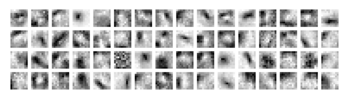

Files already downloaded and verified
Files already downloaded and verified
Data already present. Only counting number of characters.
[55, 46, 48, 23, 47, 20, 24, 22, 24, 43, 40, 14, 16, 33, 26, 29, 22, 41, 17, 41, 42, 26, 40, 26, 34, 33, 14, 52, 26, 40]
[26, 26, 26, 26, 26, 20, 26, 45, 45, 42]
[47, 46, 26, 41, 28, 30, 23, 45, 25, 40]
Loading Alphabet: Tifinagh
Loading Alphabet: Bengali
Loading Alphabet: Gujarati
Loading Alphabet: Syriac_(Estrangelo)
Loading Alphabet: Japanese_(katakana)
Loading Alphabet: Alphabet_of_the_Magi
Loading Alphabet: Balinese
Loading Alphabet: Hebrew
Loading Alphabet: Greek
Loading Alphabet: Grantha
Loading Alphabet: Asomtavruli_(Georgian)
Loading Alphabet: Ojibwe_(Canadian_Aboriginal_Syllabics)
Loading Alphabet: Inuktitut_(Canadian_Aboriginal_Syllabics)
Loading Alphabet: Cyrillic
Loading Alphabet: Braille
Loading Alphabet: Anglo-Saxon_Futhorc
Loading Alphabet: Early_Aramaic
Loading Alphabet: Mkhedruli_(Georgian)
Loading Alphabet: Tagalog
Loading Alphabet: Ar

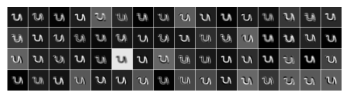

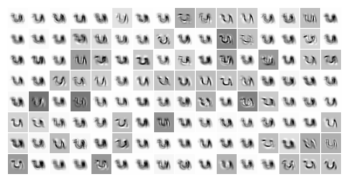

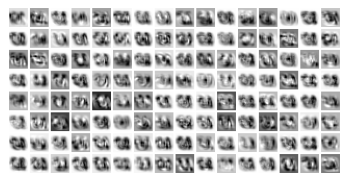

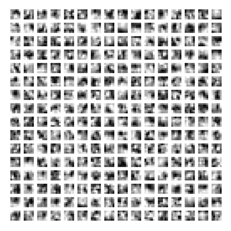

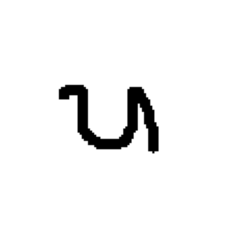

In [22]:
def main(NumPairs=30000, distort=False, save_path='/content/gdrive/My Drive/Siamese_Net/saves/',resume=True):
    net = SiameseNet()
    net.cuda()
    
    net.apply(initWeights)
    # First Train with 30k Pairs

    TrainLoader, EvalLoader, OneShotValLoader, OneShotTestLoader = read_data(NumPairs, one_shot=False, remake=False, distort=distort) 
    params = SiameseNetArgs(epochs= 200, lr=0.00006, momentum=0.5, save_every=1, temp_path= save_path + "Checkpoint_"+str(NumPairs), best_path=save_path+"Best_"+str(NumPairs))
    
    criterion = torch.nn.BCEWithLogitsLoss(reduction='mean')
    optimizer = torch.optim.Adam(net.parameters(), lr = params.lr)
    
    epoch = 0
    best_epoch_error = 10 
    val_errors = []
    os_errors = []
    avg_loss = []
    isbest_counter =0

    if not os.path.exists(params.temp_path):
        os.mkdir(params.temp_path)
    elif resume:
        print('Checkpoint Folder already exists. Resuming from checkpoint.')
        ch = os.path.join(params.temp_path, 'checkpoint.pt')
        checkpoint = torch.load(ch)
        
        epoch = checkpoint['epoch']
        print("ckp epoch ", checkpoint['epoch']) 
        val_err = checkpoint['val_err']
        os_err = checkpoint['os_err']
        net.load_state_dict(checkpoint['state_dict'])
        optimizer.load_state_dict(checkpoint['optimizer'])
        val_errors = checkpoint['val_errors']
        avg_loss = checkpoint['avg_loss']
        os_errors = checkpoint['os_errors'] 

        ch = os.path.join(params.best_path, 'best.pt')
        best_checkpoint = torch.load(ch)
        best_epoch = best_checkpoint['epoch']
        best_epoch_error = best_checkpoint['os_err']

        if (epoch-1-best_epoch) >= 20:
          return 

        if (best_epoch>epoch):
          isbest_counter = best_epoch - epoch
          epoch = best_epoch
          print("updating ckp epoch to best_ckp epoch ", epoch) 
          val_err = best_checkpoint['val_err']
          os_err = best_checkpoint['os_err']
          net.load_state_dict(best_checkpoint['state_dict'])
          optimizer.load_state_dict(best_checkpoint['optimizer'])
          val_errors = best_checkpoint['val_errors']
          avg_loss = best_checkpoint['avg_loss']
          os_errors = best_checkpoint['os_errors'] 

    else: 
        return # Do One-Shot Test

    if not os.path.exists(params.best_path):
        os.mkdir(params.best_path)
    
    while epoch < params.epochs: 
        # Train 
        print("Epoch: {}. Start Training.".format(epoch))
        train_err = train(TrainLoader, net, criterion=criterion, optimizer=optimizer, epoch=epoch)
        batch_loss = train_err/int(len(TrainLoader))
        avg_loss.append(batch_loss)
        print ("Total Train Loss = {}.     Avg. Loss/batch = {}".format(train_err, batch_loss))
        
        # Validate
        print("Done Training. Start Evaluation.")
        val_err = validate(EvalLoader, net)
        print("Epoch: {}, Val Error: {}".format(epoch, val_err))
        val_errors.append(val_err)

        # Validate One-Shot
        print("Start One-Shot Validation.")
        os_err = oneshot(OneShotValLoader, net)
        print("Epoch: {}, OneShot Error: {}".format(epoch, os_err))
        os_errors.append(os_err)

        if epoch == 0:
            best_epoch_error = os_err

        is_best = os_err < best_epoch_error
        best_epoch_error = min(os_err, best_epoch_error) 

        if epoch % params.save_every == 0:
            print("Saving Checkpoint at Epoch", epoch) 
            fd = open(params.temp_path+'/epoch.txt', 'w')
            fd.write("Epoch: " + str(epoch) + " Val error: " + str(val_err))
            fd.write("Epoch: " + str(epoch) + " OneShot error: " + str(os_err))
            fd.close() 

            checkpoint = {
            'epoch': epoch + 1,
            'os_err': os_err,
            'val_err': val_err,
            'state_dict': net.state_dict(),
            'optimizer': optimizer.state_dict(),
            'val_errors' : val_errors,
            'avg_loss' : avg_loss,
            'os_errors' : os_errors
            }
            torch.save(checkpoint, os.path.join(params.temp_path, 'checkpoint.pt'))
        if is_best:
            isbest_counter = 0
            best_epoch = epoch
            print("Saving Best at Epoch {} with OneShot error {os_error:.4f} and val error {error:.4f}".format(epoch, os_error = best_epoch_error, error=val_err))
            os.path.join(params.best_path, 'epoch.txt')
            fd = open(params.best_path+'/epoch.txt', 'w')
            fd.write("Epoch: " + str(epoch) + " Val error: " + str(val_err))
            fd.write("Epoch: " + str(epoch) + " OneShot error: " + str(os_err))
            fd.close() 

            checkpoint = {
            'epoch': epoch,
            'val_err': val_err,
            'os_err': best_epoch_error,
            'state_dict': net.state_dict(),
            'optimizer': optimizer.state_dict(),
            'val_errors' : val_errors,
            'avg_loss' : avg_loss,
            'os_errors' : os_errors
            }
            torch.save(checkpoint, os.path.join(params.best_path, 'best.pt'))
        else :
            isbest_counter = isbest_counter + 1 

        if isbest_counter >= 20 :         # early stopping
            print("Early stopping because One-Shot error didn't improve for last 20 epochs.")
            print("Stopping epoch : ", epoch, "   Best OneShot error ", best_epoch_error, " in epoch : ", best_epoch)
            break; 

        epoch+=1    


    # One Shot
    print("Start One-Shot Test")
    os_err = oneshot(OneShotTestLoader, net)
    print("Epoch: {}, OneShot Error: {}".format(epoch, os_err))
    os_errors.append(os_err)

    file = open(params.best_path+'/val_errors.txt', mode='w+')
    file.write(str(val_errors))
    file.close()
    file = open(params.best_path+'/train_losses.txt', mode='w+')
    file.write(str(avg_loss))
    file.close()
    file = open(params.best_path+'/OneShot_acc.txt', mode='w+')
    file.write(str(os_errors))
    file.close()


def OneShotTest(NumPairs=30000,  load_path='/content/gdrive/My Drive/Siamese_Net/saves/', latest = False):
    net = SiameseNet()
    net.cuda()
     
    _, _, _, OneShotTestLoader = read_data(NumPairs, one_shot=False, remake=False)
   
    if latest == False :
      load_path=load_path + "Best_"+str(NumPairs)
      checkpoint = torch.load(os.path.join(load_path, 'best.pt'))
      print("best ckp epoch ", checkpoint['epoch'])
      net.load_state_dict(checkpoint['state_dict'])
    else:
      load_path=load_path + "Checkpoint_"+str(NumPairs)
      checkpoint = torch.load(os.path.join(load_path, 'checkpoint.pt'))
      print("latest ckp epoch ", checkpoint['epoch'])
      net.load_state_dict(checkpoint['state_dict'])


    # One Shot
    net.eval()
    print("Start One-Shot Test")
    os_err = oneshot(OneShotTestLoader, net)
    print("One-Shot Test Error: {}".format(os_err)) 
    return os_err

def plotFilters(NumPairs=30000, load_path = '/content/gdrive/My Drive/Siamese_Net/saves/'):
    net = SiameseNet()

    load_path += 'Checkpoint_' + str(NumPairs)
   
    checkpoint = torch.load(os.path.join(load_path, 'checkpoint.pt'))
    print("ckp epoch ", checkpoint['epoch'])
    net.load_state_dict(checkpoint['state_dict'])

    kernels = net.layer1[0].weight.detach().cpu()
    kernels = kernels.view(-1, 1, 10, 10)
    imshow(torchvision.utils.make_grid(kernels, pad_value=1, normalize=True, scale_each=True, nrow = 16))

    activations = {}

    def get_activation(name):
        def hook(model, input, output):
            activations[name] = output.detach()
        return hook
    
    net.layer1[0].register_forward_hook(get_activation('layer0'))
    net.layer1[3].register_forward_hook(get_activation('layer3'))
    net.layer1[6].register_forward_hook(get_activation('layer6'))
    net.layer1[9].register_forward_hook(get_activation('layer9'))
    TrainLoader, EvalLoader, OneShotValLoader, OneShotTestLoader = read_data(NumPairs, one_shot=False, remake=False, distort=False)
    dataiter = iter(TrainLoader)
    img1, img2, _ = dataiter.next()
    img1 = img1[0].view(-1, 1, 105, 105)
    img2 = img2[0].view(-1, 1, 105, 105)
    out = net(img1, img2)
    act = {}
    act[0] = activations['layer0'].view(-1, 1, 96, 96)
    act[1] = activations['layer3'].view(-1, 1, 42, 42)
    act[2] = activations['layer6'].view(-1, 1, 18, 18)
    act[3] = activations['layer9'].view(-1, 1, 6, 6)
    
    for i in range(4):
        imshow(torchvision.utils.make_grid(act[i], nrow = 16, pad_value=1, normalize=True, scale_each=True))
    imshow(torchvision.utils.make_grid(img2.view(-1, 1, 105, 105), scale_each=True))


def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)), cmap='magma', interpolation=None)
    plt.axis('off')
    plt.show()

if __name__ == '__main__':
  NumPairs = 150000
  spath = '/content/gdrive/My Drive/Siamese_Net/saves/Affine_'
  main(NumPairs=NumPairs, distort=True, save_path=spath)
  print(np.mean([OneShotTest(NumPairs=NumPairs, load_path=spath, latest = True) for i in range(10)]))
  plotFilters(NumPairs=NumPairs, load_path=spath)